The purpose of this notebook is to apply the perceptron model to the iris dataset. In order to implement the perceptron model, scikitlearn library will be used.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
import random
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [17]:
from sklearn.datasets import load_iris

iris = load_iris()

# Create a DataFrame with features, targets, and target names
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target_names'] = iris.target_names[iris.target]

# Rename the 'target_names' column to 'variety'
iris_df.rename(columns={'target_names': 'variety'}, inplace=True)

# Display the updated DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
iris_df['variety'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Exploratory Data Analysis

Pick two classes of data (i.e., two species of Iris) and two features from the four in the dataset, so that the data for two species are linearly separable using the features that you have chosen. 

### 1. Feature Selection

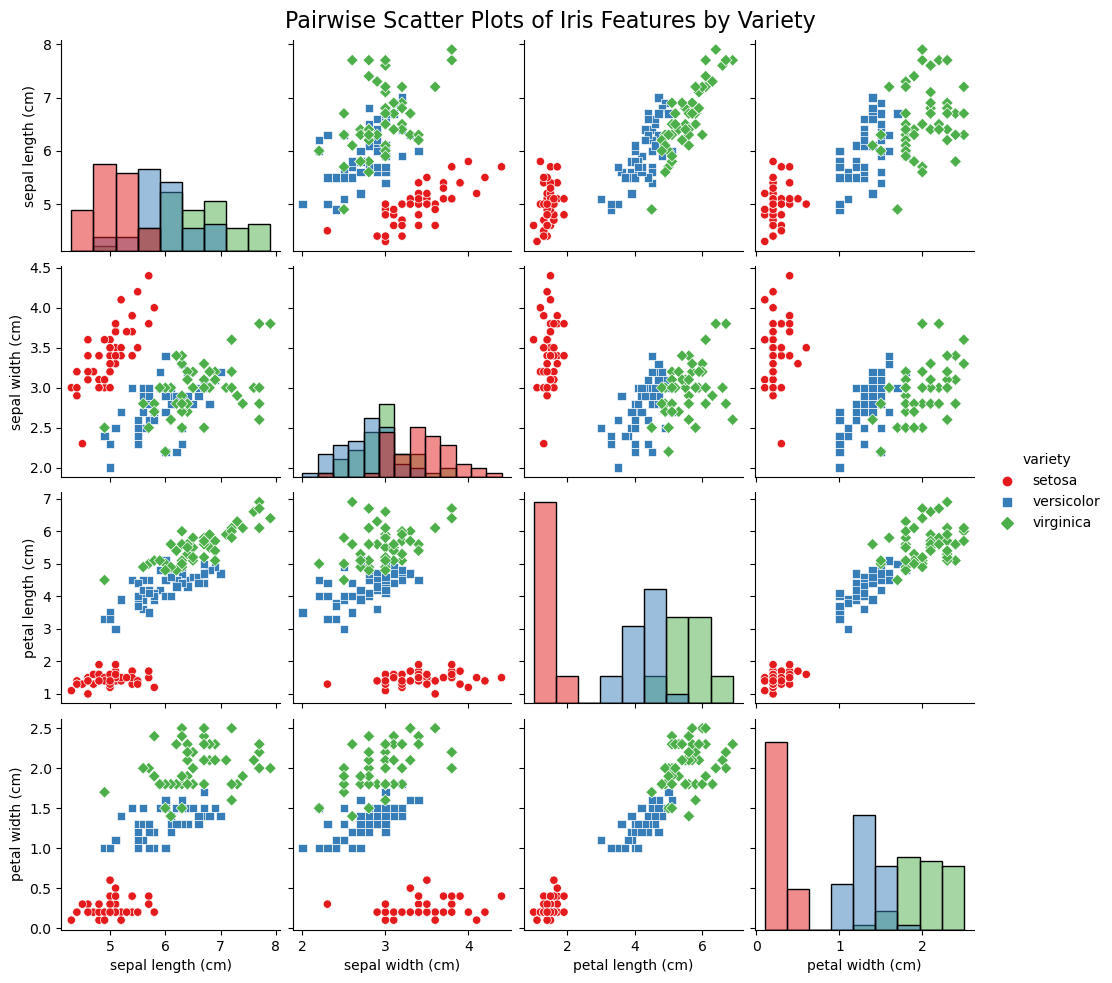

In [24]:
# Create a pairplot with hue (color) based on 'variety' (species)
sns.pairplot(iris_df, hue='variety', palette='Set1', markers=["o", "s", "D"], diag_kind='hist')

# Customize the title
plt.subplots_adjust(top=0.95)
plt.suptitle('Pairwise Scatter Plots of Iris Features by Variety', fontsize=16)

# Show the plot
plt.show()

Setosa and Virginca seem to be clustered away from each other between all features so we will use these two classes to buil our models. 

### Training Perceptron via Scikit-learn

In [34]:
# Filter the dataset for 'setosa' and 'virginica' species
filtered_df = iris_df[iris_df['variety'].isin(['setosa', 'virginica'])]

# Select the features and target
X = filtered_df[['sepal length (cm)', 'petal width (cm)']]
y = pd.factorize(filtered_df['variety'])[0] # Since the perceptron only intakes binary values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [37]:
print('#Training data points: {}'.format(X_train.shape[0]))
print('#Testing data points: {}'.format(X_test.shape[0]))
print('Class labels: {} (mapped from {}'.format(np.unique(y), np.unique(filtered_df['variety'])))

#Training data points: 67
#Testing data points: 33
Class labels: [0 1] (mapped from ['setosa' 'virginica']


### Standardization for Gradient Descent

StandardScaler is a preprocessing technique in scikit-learn that standardizes features by removing the mean and scaling to unit variance.

The standardization should calculate the mean μ and variance σ2 using only the training set, as the testing set must be remain unknown during the entire training process.

In [38]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [39]:
# Initialize the Perceptron model
perceptron_model = Perceptron(max_iter=20, eta0=0.1, random_state=42)

# Train the model on the standardized training data
perceptron_model.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=20, random_state=42)

In [42]:
# Make predictions over the testing set and report the accuracy
y_pred = perceptron_model.predict(X_test_std)

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 0
Accuracy: 1.00


### Training Perceptron with 3 and 4 Features

In [45]:
# Select the features and target
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']]
y = iris_df['variety']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Perceptron model
perceptron_model = Perceptron(max_iter=1000, eta0=0.1, random_state=0)

# Train the model on the training data
perceptron_model.fit(X_train, y_train)

# Predict the classes on the testing data
y_pred = perceptron_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of the Perceptron model: {accuracy:.2f}")

Accuracy of the Perceptron model: 0.70


In [51]:
# Select all four features and the target
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_df['variety']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Perceptron model
perceptron_model = Perceptron(max_iter=100, eta0=0.1, random_state=0)

# Train the model on the training data
perceptron_model.fit(X_train, y_train)

# Predict the classes on the testing data
y_pred = perceptron_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of the Perceptron model: {accuracy:.2f}")

Accuracy of the Perceptron model: 0.80


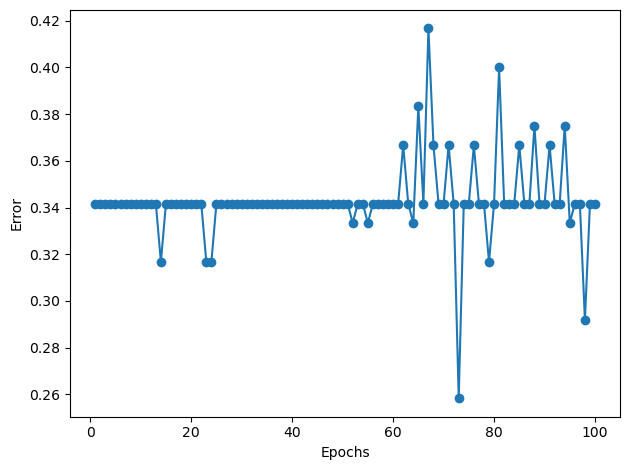

In [52]:
# Lists to store error values during training
errors = []

# Training loop
for _ in range(perceptron_model.max_iter):
    # Fit the model to the training data for one epoch
    perceptron_model.partial_fit(X_train, y_train, classes=np.unique(y))
    
    # Calculate the accuracy on the training data
    y_train_pred = perceptron_model.predict(X_train)
    accuracy = np.mean(y_train == y_train_pred)
    
    # Calculate the misclassification error (1 - accuracy)
    error = 1 - accuracy
    errors.append(error)

# Plot the error vs. epochs
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')

plt.tight_layout()
plt.show()

The Perceptron model we've built has an accuracy of 80%, but it's not performing as well as we'd like. The reason for this is that the training process doesn't reach a point where it stops updating the weights. This continuous updating occurs when the data points cannot be perfectly separated by a single straight line (hyperplane). To address this issue, we can set a maximum number of training epochs to limit the training process and achieve a more stable model.